# PROBLEM STATEMENT

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

In [107]:
# importing necessary libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [108]:
# loading the data set
df=pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [109]:
# let's check the number of rows and columns

df.shape

(99999, 226)

In [110]:
# let's check overall info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [111]:
# summary statistics

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Data Preparation and cleaning

### High value customers
     Let us first define high value customers based on 70th percentile of the average recharge amount in the first two months (the good phase).

In [112]:
recharge = [col for col in df.columns if 'rech' in col]
recharge

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [113]:
# let's calculate total recharge amount for data since we do not have it

df['total_data_rech_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_data_rech_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_data_rech_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_data_rech_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

In [114]:
# Dropping redundant columns

df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [115]:
# Average recharge amount for good phase 

gp_average_rech_amt = (df['total_rech_amt_6'].fillna(0) + df['total_rech_amt_7'].fillna(0) + 
                               df['total_data_rech_amt_6'].fillna(0) + df['total_data_rech_amt_7'].fillna(0) )/2

In [116]:
# getting the 70th percentile from the average recharge amount in the good phase

gd_phase_avg_rech_amt_70 = np.percentile(gp_average_rech_amt, 70.0)
print(f'70th percentile of recharge amount in good phase is : {gd_phase_avg_rech_amt_70}')

70th percentile of recharge amount in good phase is : 478.0


In [117]:
# keeping only the high value customers

df = df[gp_average_rech_amt>=gd_phase_avg_rech_amt_70]

In [118]:
# let's check the rows and columns to verify

df.shape

(30001, 222)

#### OBSERVATIONS
- There are 30,001 rows as expected we would get after filtering

### Tagging churners and removing attributes of churn phase

In [119]:
churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [120]:
df['churn'] = 0
df['churn'] = np.where(df[churn_col].sum(axis=1)==0,1,0)

In [121]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0,0


In [122]:
df.churn.value_counts(normalize=True)

churn
0    0.918636
1    0.081364
Name: proportion, dtype: float64

#### OBSERVATIONS
- Data imbalance detected

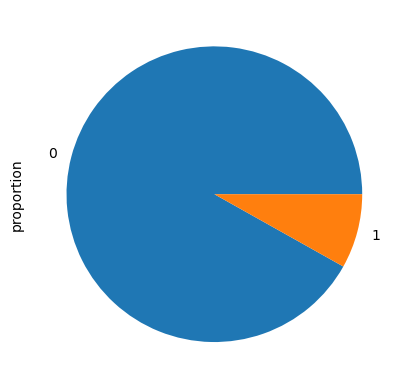

In [123]:
df.churn.value_counts(normalize=True).plot.pie()
plt.show()

In [124]:
# Dropping all columns related to month 9

mnth_9 = [col for col in df.columns if '9' in col]
df.drop(df[mnth_9], axis=1, inplace=True)

In [125]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,1.0,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,0


In [126]:
# let's check for missing values

round(df.isnull().mean()*100,2).sort_values(ascending = False)

date_of_last_rech_data_8    46.83
count_rech_3g_8             46.83
count_rech_2g_8             46.83
arpu_3g_8                   46.83
total_data_rech_amt_8       46.83
                            ...  
vol_2g_mb_6                  0.00
vol_2g_mb_7                  0.00
vol_2g_mb_8                  0.00
vol_3g_mb_6                  0.00
churn                        0.00
Length: 170, dtype: float64

In [127]:
# Dropping columns with greater than 40% missing values

for col in df.columns:
    if df[col].isnull().mean()*100>40:
        del df[col]

In [128]:
# rechecking missing values

round(df.isnull().mean()*100,2).sort_values(ascending = False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

In [129]:
# Since rest of the rows have less than 5% missing values we can drop the rows

for cols in df.columns:
    df = df[~df[cols].isna()]

In [130]:
# rechecking missing values

round(df.isnull().mean()*100,2).sort_values(ascending = False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

In [131]:
# date columns don't add any value so we will drop them

date_cols = [col for col in df.columns if 'date' in col]
df.drop(df[date_cols], axis=1, inplace=True)

In [132]:
# let's check the shape

df.shape

(28163, 137)

#### OBSERVATIONS
- There are 137 features present with us at the moment

## Exploratory Data Analysis

In [133]:
# let's check columns having only one value

cols_one_val=[]
for cols in df.columns:
    if df[f'{cols}'].nunique()==1:
        cols_one_val.append(cols)
cols_one_val        

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [134]:
# Dropping single value columns

df.drop(df[cols_one_val], axis=1, inplace=True)

In [135]:
# Dropping mobile number 

df.drop('mobile_number', axis=1, inplace=True)

In [136]:
# checking correlation between features

corr = df.corr()
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
arpu_6,1.000000,0.728704,0.671437,0.344261,0.229775,0.203050,0.522381,0.364240,0.317065,0.120487,...,0.117591,0.000399,-0.022610,-0.015065,0.038662,0.064379,0.064484,0.112390,0.048972,0.053009
arpu_7,0.728704,1.000000,0.778413,0.216760,0.315360,0.266252,0.367674,0.489262,0.396307,0.097937,...,0.139794,-0.024525,0.009314,-0.001001,0.021055,0.079945,0.101304,0.059976,0.059460,0.031106
arpu_8,0.671437,0.778413,1.000000,0.160508,0.229314,0.336528,0.296584,0.375228,0.516021,0.094989,...,0.222901,-0.019244,-0.002587,0.042886,0.056765,0.137762,0.085421,0.079657,0.105113,-0.091680
onnet_mou_6,0.344261,0.216760,0.160508,1.000000,0.770224,0.646114,0.077771,0.031731,0.030902,0.020531,...,-0.076849,-0.052276,-0.046161,-0.045674,-0.050649,-0.107692,-0.111793,-0.102431,-0.035277,0.085482
onnet_mou_7,0.229775,0.315360,0.229314,0.770224,1.000000,0.811314,0.048873,0.071723,0.063246,0.040034,...,-0.078935,-0.054838,-0.054382,-0.045373,-0.062060,-0.108738,-0.111696,-0.109408,-0.035306,0.052012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_vbc_3g,0.064379,0.079945,0.137762,-0.107692,-0.108738,-0.086491,-0.094265,-0.097650,-0.063786,0.009302,...,0.461077,0.052682,0.050444,0.056593,0.027138,1.000000,0.706559,0.594347,0.196281,-0.069336
jul_vbc_3g,0.064484,0.101304,0.085421,-0.111793,-0.111696,-0.093719,-0.101101,-0.104359,-0.077575,-0.000953,...,0.387110,0.067146,0.064058,0.048673,0.025174,0.706559,1.000000,0.680020,0.152299,-0.047696
jun_vbc_3g,0.112390,0.059976,0.079657,-0.102431,-0.109408,-0.086533,-0.085691,-0.098618,-0.072681,0.009793,...,0.360080,0.066235,0.052958,0.047687,0.020976,0.594347,0.680020,1.000000,0.142703,-0.043288
sep_vbc_3g,0.048972,0.059460,0.105113,-0.035277,-0.035306,-0.029775,-0.020279,-0.021911,-0.011508,0.006628,...,0.110797,0.063128,0.050093,0.053123,0.009799,0.196281,0.152299,0.142703,1.000000,-0.035602


In [137]:
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.728704
arpu_8       arpu_6         0.671437
             arpu_7         0.778413
onnet_mou_7  onnet_mou_6    0.770224
onnet_mou_8  onnet_mou_6    0.646114
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620313
jul_vbc_3g   vol_3g_mb_7    0.651025
             aug_vbc_3g     0.706559
jun_vbc_3g   vol_3g_mb_6    0.662497
             jul_vbc_3g     0.680020
Length: 207, dtype: float64

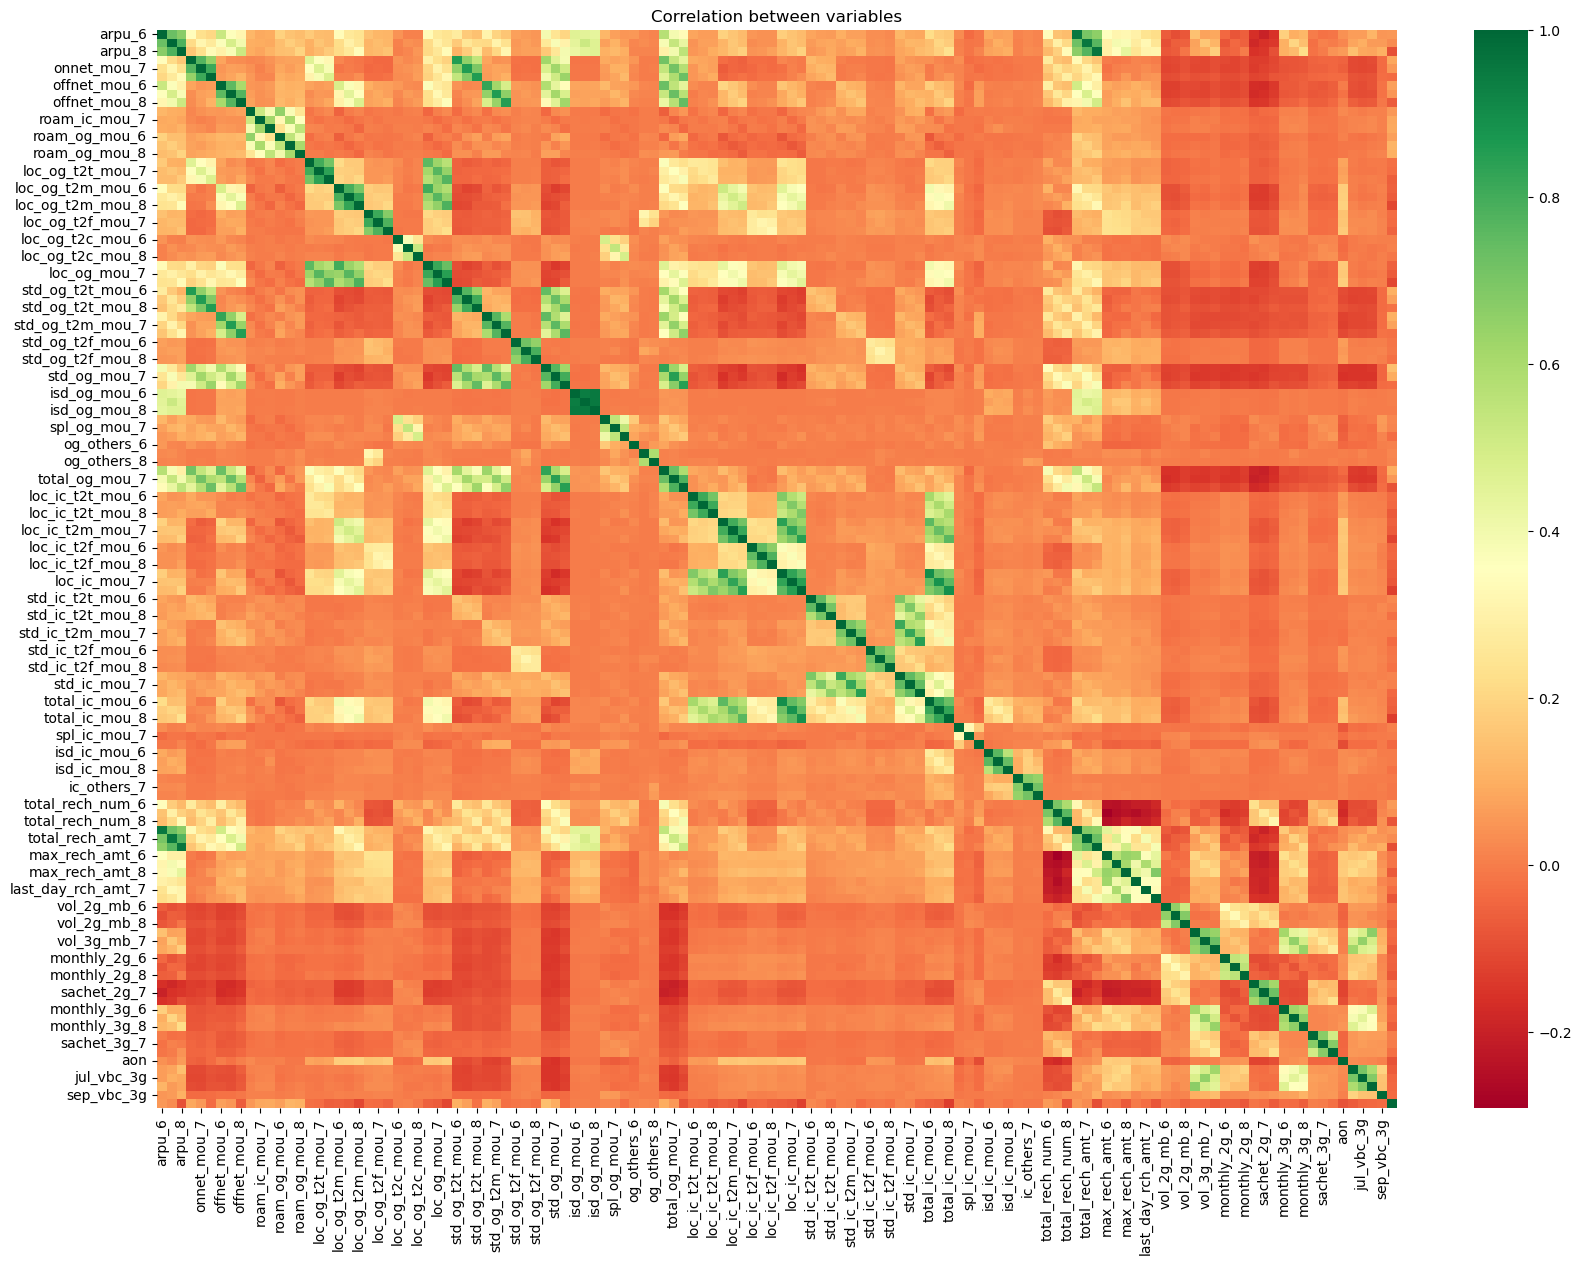

In [138]:
# plotting a heatmap

plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), cmap='RdYlGn')
plt.title('Correlation between variables')
plt.show()

In [139]:
# Dropping columns with high correlation values

corr_cols = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 
             'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 
             'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
             'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'total_ic_mou_6', 
             'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7','total_rech_amt_8', 
             'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
             'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 
             'loc_og_t2m_mou_8','loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
df.drop(corr_cols, axis=1, inplace=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


### Deriving features

In [140]:
# instead of offnet and onnet we will create total_mou

df['total_mou_6'] = df['onnet_mou_6'] + df['offnet_mou_6']
df['total_mou_7'] = df['onnet_mou_7'] + df['offnet_mou_7']
df['total_mou_8'] = df['onnet_mou_8'] + df['offnet_mou_8']

In [141]:
# Dropping redundant columns

df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 
         'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,...,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


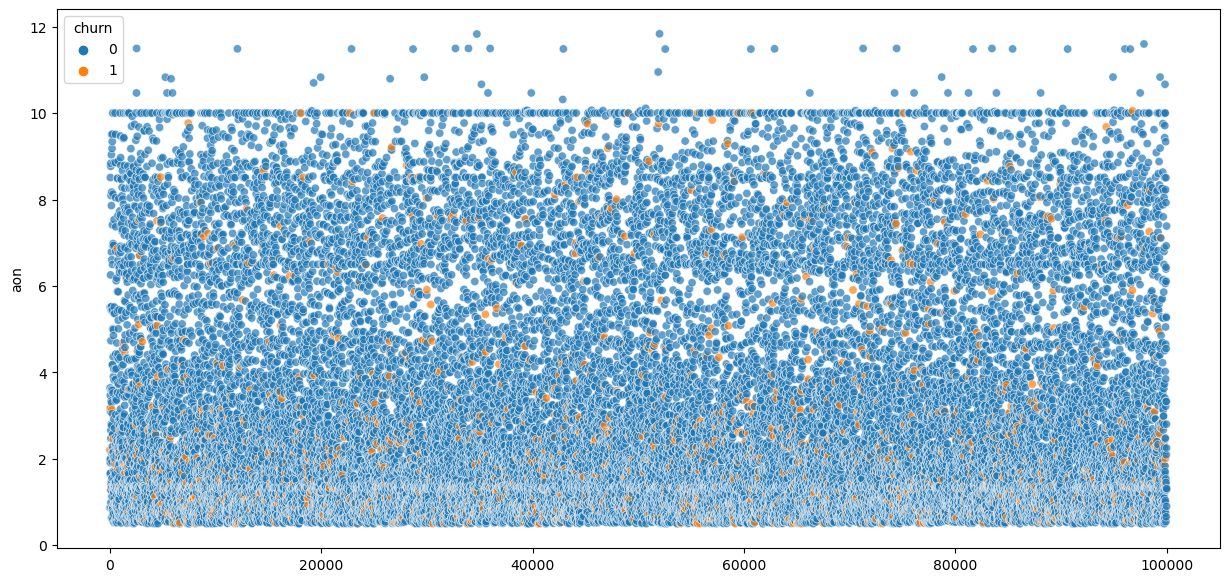

In [142]:
# checking churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=df['aon'] / 365, x=df.index, hue=df.churn, alpha=0.7)
plt.show()

#### OBSERVATIONS
- Majority of customers who have churned have tenure of less than 4 years

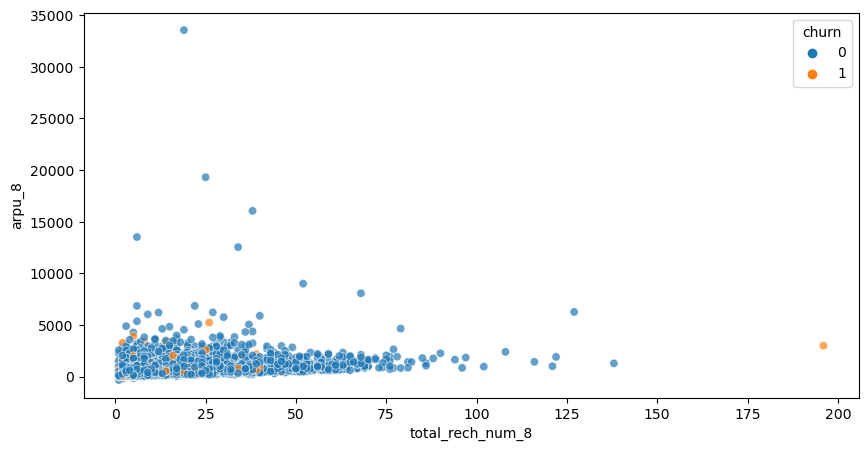

In [143]:
# scatterplot between total recharge amount and revenue for th the 8th month

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['total_rech_num_8'], y=df['arpu_8'], hue=df['churn'], alpha=0.7)
plt.show()

In [144]:
# let's take average of arpu_6 and arpu_7 together

df["avg_arpu_6_7"]= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

7     1209.5150
8      435.4720
21     556.1030
23     134.1235
33    1669.9265
Name: avg_arpu_6_7, dtype: float64

In [145]:
# Dropping original columns

df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

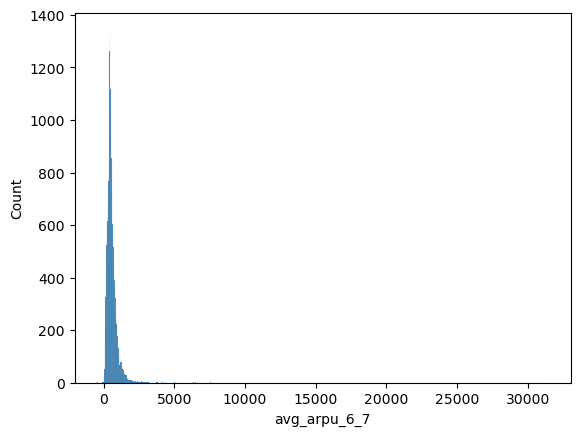

In [146]:
sns.histplot(df["avg_arpu_6_7"])
plt.show()

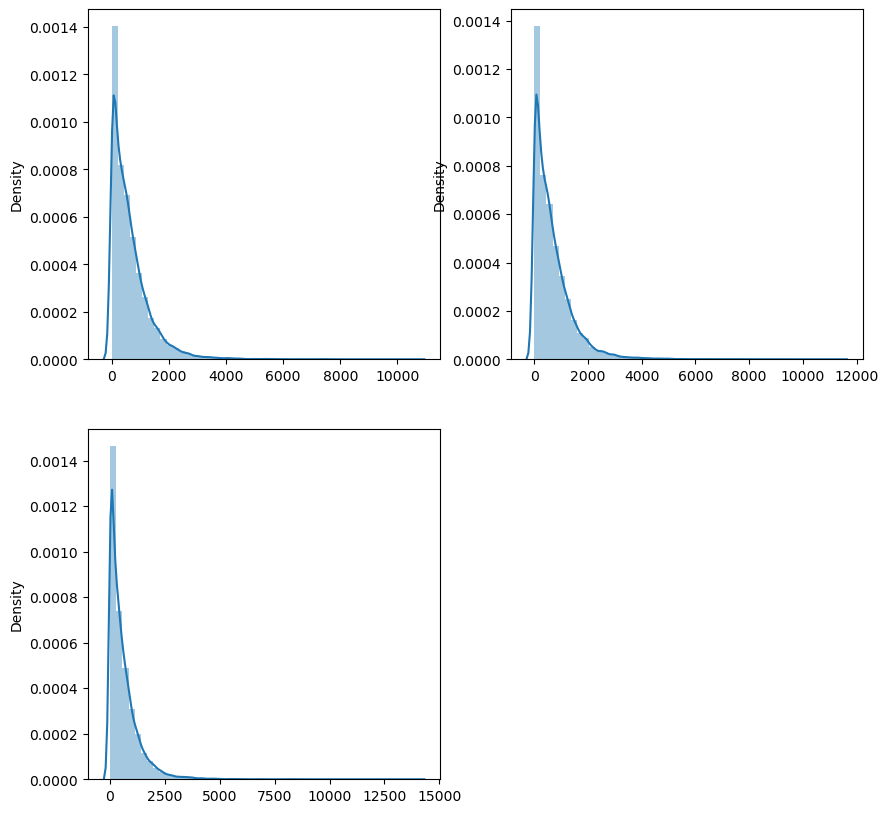

In [147]:
var = ['total_mou_6','total_mou_7','total_mou_8']
plt.figure(figsize=(10,10))
c=1
for i in var:
    plt.subplot(2,2,c)
    sns.distplot(x=df[i])
    c=c+1
plt.show()    

In [148]:
# checking outliers

df.describe()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8,avg_arpu_6_7
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,...,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,16.352159,12.912045,13.145865,26.923494,20.591421,20.926258,1.602511,1.930012,1.789363,...,1233.456627,173.745705,180.655113,157.965702,8.375813,0.054611,645.183824,667.004398,597.378280,567.163074
std,500.479643,75.823777,76.601091,76.125433,116.586425,97.777508,107.722393,6.349558,9.269670,7.390599,...,962.975074,424.621028,447.089836,415.879933,53.404668,0.227223,687.216330,720.418277,706.447419,431.807280
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-451.713500
25%,258.075500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.850000,157.240000,117.170000,355.689750
50%,445.338000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,461.890000,472.920000,387.240000,490.352500
75%,675.208500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.130000,...,1810.500000,142.470000,141.360000,98.075000,0.000000,0.000000,897.050000,935.570000,826.920000,682.077250
max,33543.624000,2613.310000,3813.290000,4169.810000,3775.110000,2812.040000,5337.040000,271.440000,569.710000,351.830000,...,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1.000000,10673.280000,11359.940000,14043.050000,31438.461000


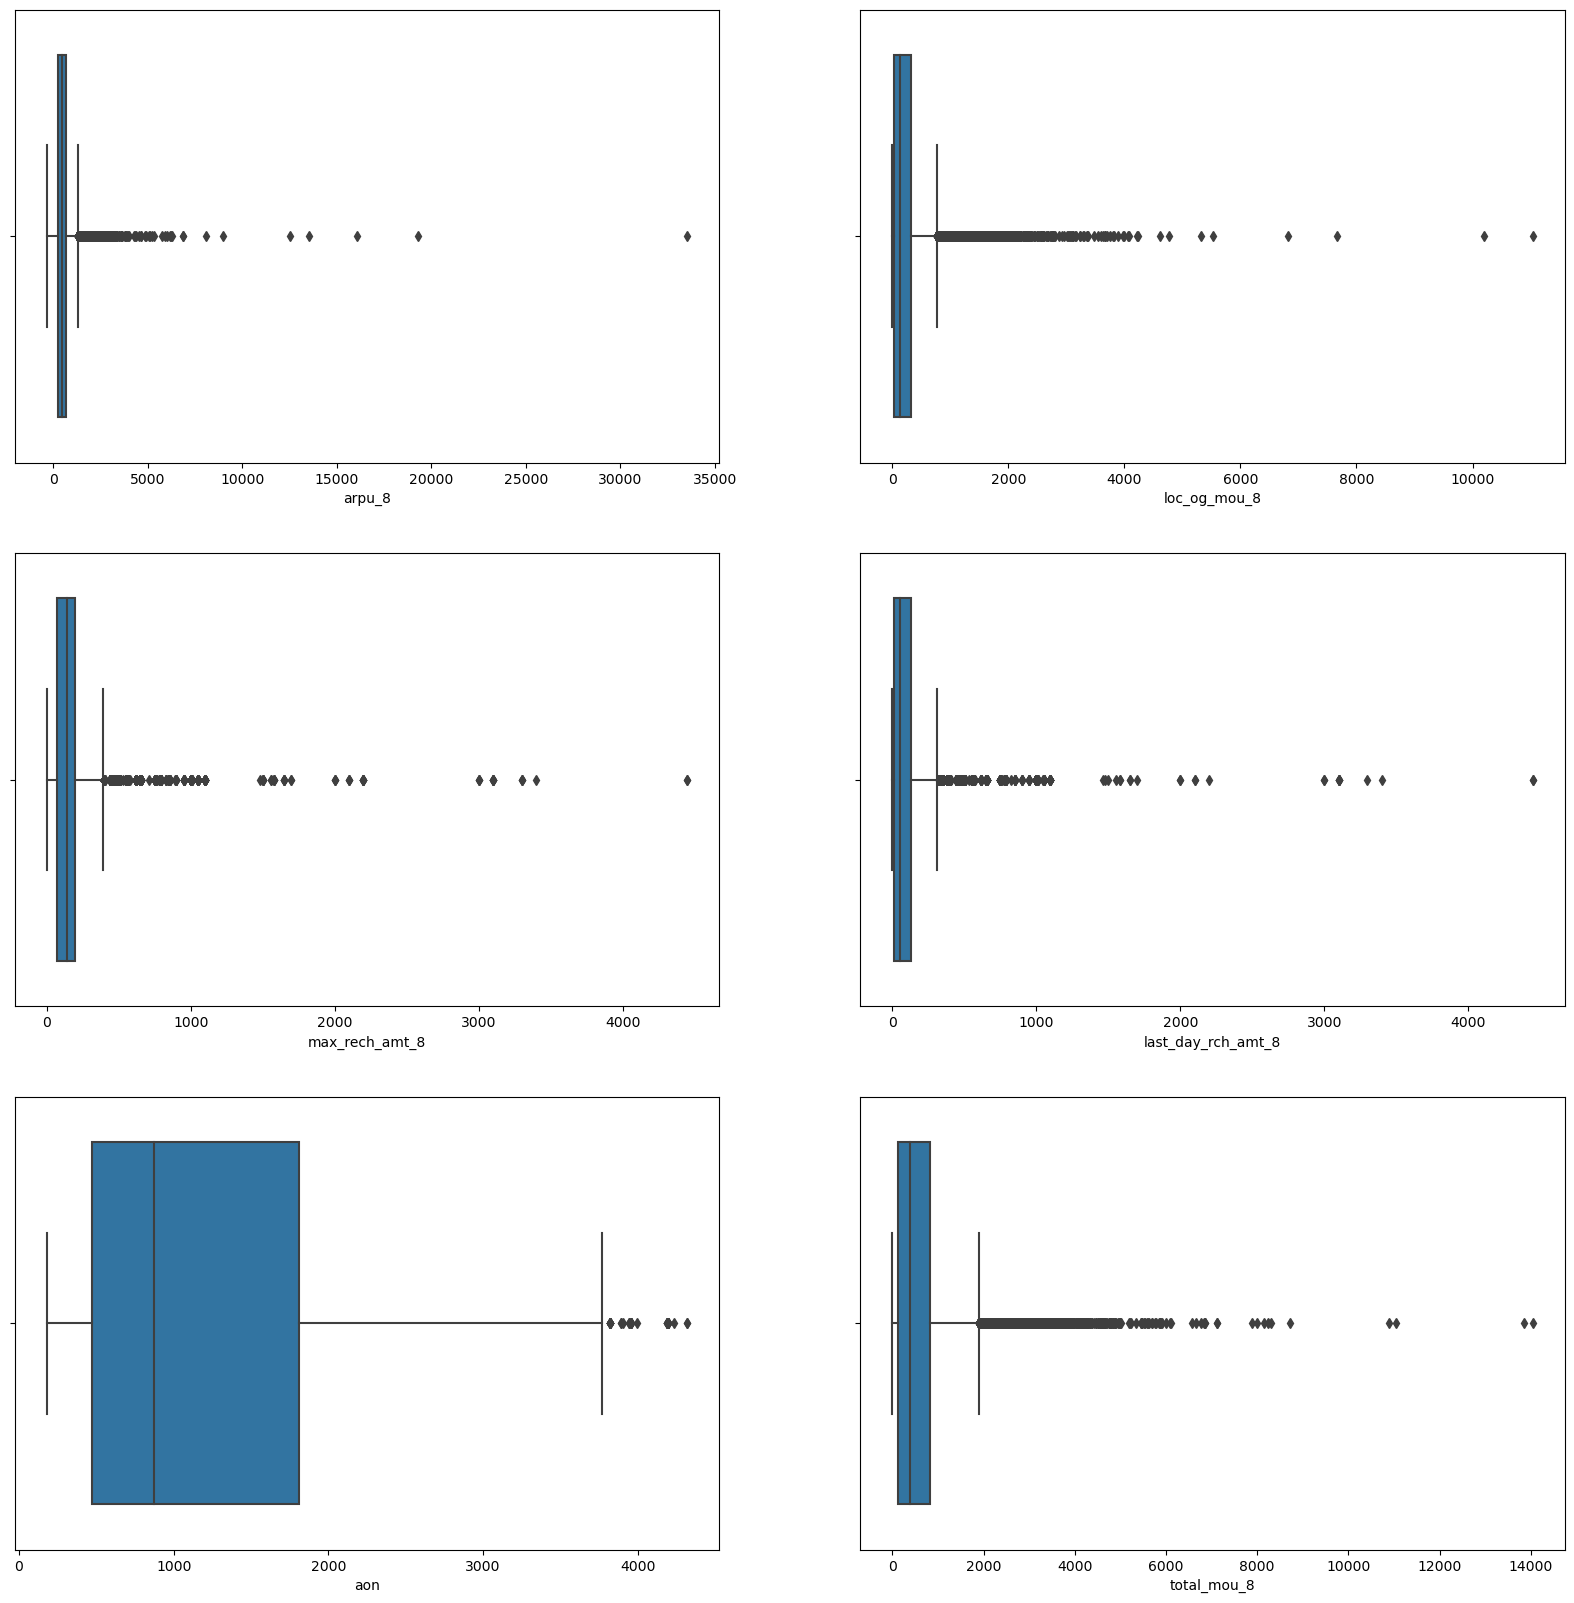

In [149]:
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8']
plt.figure(figsize=(20,20))
c=1
for i in col_boxplot:
    plt.subplot(3,2,c)
    sns.boxplot(x=df[i])
    c=c+1
plt.show()   

#### OBSERVATIONS
- Presence of outliers detected

In [150]:
# Capping features having outliers

upper_limit = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000)]
for i, val in upper_limit:
    df[i] = df[i].apply(lambda x : x if x < val else val)    

In [151]:
df[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8
7,3171.480,255.79,1000,779,802,378.20
8,137.362,63.04,30,10,315,171.56
21,637.760,129.74,50,50,720,1068.53
23,366.966,182.14,179,0,604,239.47
33,409.230,0.00,455,455,1328,0.00


## Data Modeling

### Standardization

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
y=df['churn']
y.head()

7     1
8     0
21    0
23    0
33    0
Name: churn, dtype: int32

In [154]:
X=df.drop('churn', axis=1)
X.head()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_6,total_mou_7,total_mou_8,avg_arpu_6_7
7,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,...,0,802,57.74,19.38,18.74,0.0,511.27,621.84,378.20,1209.5150
8,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,...,0,315,21.03,910.65,122.16,0.0,508.35,431.66,171.56,435.4720
21,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0,720,0.00,0.00,0.00,0.0,860.34,1028.79,1068.53,556.1030
23,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,...,1,604,40.45,51.86,0.00,0.0,134.37,140.02,239.47,134.1235
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,...,0,1328,358.10,2706.83,1714.67,0.0,0.00,0.00,0.00,1669.9265


In [155]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_mou_6,total_mou_7,total_mou_8,avg_arpu_6_7
7,6.141036,-0.001611,0.268643,0.242947,-0.027306,-0.081834,0.159057,-0.252386,-0.208211,-0.242118,...,-0.186557,-0.447489,-0.273203,-0.360728,-0.334780,-0.15684,-0.194868,-0.062693,-0.321714,1.487616
8,-0.904173,-0.215664,-0.168565,-0.172690,-0.230936,-0.210598,-0.194264,-0.252386,-0.208211,0.725345,...,-0.186557,-0.984300,-0.359658,1.632799,-0.086098,-0.15684,-0.199117,-0.326683,-0.633134,-0.304982
21,0.257749,-0.215664,-0.168565,-0.172690,-0.230936,-0.210598,-0.194264,-0.252386,-0.208211,-0.242118,...,-0.186557,-0.537876,-0.409186,-0.404076,-0.379842,-0.15684,0.313089,0.502197,0.718658,-0.025614
23,-0.371033,-0.215664,-0.168565,-0.172690,-0.230936,-0.210598,-0.194264,-0.252386,-0.208211,2.154212,...,0.709113,-0.665740,-0.313922,-0.288079,-0.379842,-0.15684,-0.743322,-0.731511,-0.530789,-1.002872
33,-0.272896,-0.215664,-0.168565,-0.172690,-0.230936,-0.210598,-0.194264,-0.252386,-0.208211,-0.166344,...,-0.186557,0.132311,0.434170,5.650363,3.743224,-0.15684,-0.938853,-0.925874,-0.891686,2.553878


### Handling class imbalance
  We are going to use SMOTE (Synthetic Minority Oversampling Technique) to deal with class imbalance

In [156]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [157]:
y_res.value_counts()

churn
1    26625
0    26625
Name: count, dtype: int64

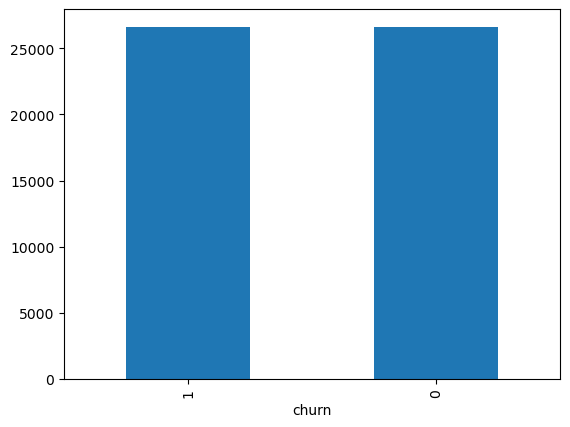

In [158]:
y_res.value_counts().plot.bar()
plt.show()

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=52)

In [160]:
import statsmodels.api as sm

In [161]:
# Instantiating the model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37192
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15277.
Date:                Tue, 06 Feb 2024   Deviance:                       30554.
Time:                        09:37:09   Pearson chi2:                 5.02e+09
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4325
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8855      0.031    -60.490      0.000      -1.947      -1.824
arpu_8                 0.2853      0.050      5.750      0.000       0.188       0.383
roam_ic_mou_6          0.0455      0.022      2.090      0.037       0.003       0.088
roam_ic_mou_7          0.0244      0.025      0.968      0.333      -0.025       0.074
roam_ic_mou_8          0.0053      0.018      0.297      0.767      -0.030       0.040
roam_og_mou_6          0.5392      0.348      1.551      0.121      -0.142       1.220
roam_og_mou_7          0.6793      0.260      2.614      0.009       0.170       1.189
roam_og_mou_8          0.0704      0.032      2.197      0.028       0.008       0.133
loc_og_t2c_mou_6      -0.1238      0.023     -5.409      0.000      -0.169      -0.079
loc_og_t2c_mou_7       0.0072      0.027      0.262      0.793      -0.046       0.061
loc_og_t2c_mou_8       0.1511      0.027      5.538      0.000       0.098       0.205
loc_og_mou_6           1.7435      1.131      1.541      0.123      -0.474       3.961
loc_og_mou_7           2.4295      1.006      2.415      0.016       0.458       4.401
loc_og_mou_8          -0.9395      0.097     -9.735      0.000      -1.129      -0.750
std_og_t2f_mou_6       0.0330      0.026      1.290      0.197      -0.017       0.083
std_og_t2f_mou_7      -0.0667      0.037     -1.799      0.072      -0.139       0.006
std_og_t2f_mou_8      -0.0731      0.041     -1.762      0.078      -0.154       0.008
std_og_mou_6           3.0105      1.799      1.673      0.094      -0.515       6.537
std_og_mou_7           3.5655      1.707      2.089      0.037       0.221       6.910
std_og_mou_8          -0.4829      0.127     -3.794      0.000      -0.732      -0.233
isd_og_mou_6           0.1894      0.132      1.440      0.150      -0.068       0.447
isd_og_mou_7           0.3748      0.126      2.967      0.003       0.127       0.622
isd_og_mou_8          -0.1809      0.082     -2.217      0.027      -0.341      -0.021
spl_og_mou_6           0.1500      0.054      2.773      0.006       0.044       0.256
spl_og_mou_7           0.0616      0.057      1.085      0.278      -0.050       0.173
spl_og_mou_8          -0.3490      0.045     -7.770      0.000      -0.437      -0.261
og_others_6           -0.1516      0.035     -4.326      0.000      -0.220      -0.083
og_others_7           -0.0028      0.023     -0.123      0.902      -0.048       0.042
og_others_8            0.0382      0.030      1.275      0.202      -0.021       0.097
loc_ic_mou_6           0.1539      0.044      3.519      0.000       0.068       0.240
loc_ic_mou_7           0.5393      0.056      9.699      0.000       0.430       0.648
loc_ic_mou_8          -1.6980      0.069    -24.708      0.000      -1.833      -1.563
std_ic_t2t_mou_6       0.1293      0.0

### RFE for feature selection

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [163]:
lr = LogisticRegression()

In [164]:
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [165]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon', 'sep_vbc_3g', 'total_mou_7'],
      dtype='object')

In [166]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 40),
 ('roam_ic_mou_7', False, 53),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 43),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 34),
 ('loc_og_t2c_mou_6', False, 30),
 ('loc_og_t2c_mou_7', False, 61),
 ('loc_og_t2c_mou_8', False, 24),
 ('loc_og_mou_6', False, 42),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 50),
 ('std_og_t2f_mou_7', False, 49),
 ('std_og_t2f_mou_8', False, 29),
 ('std_og_mou_6', False, 6),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 62),
 ('isd_og_mou_7', False, 11),
 ('isd_og_mou_8', False, 10),
 ('spl_og_mou_6', False, 36),
 ('spl_og_mou_7', False, 55),
 ('spl_og_mou_8', False, 4),
 ('og_others_6', False, 17),
 ('og_others_7', False, 63),
 ('og_others_8', False, 52),
 ('loc_ic_mou_6', False, 16),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_6', False, 3),
 ('std_ic_t2t_mou_7', False, 27),


In [167]:
# Building model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37254
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15745.
Date:                Tue, 06 Feb 2024   Deviance:                       31490.
Time:                        09:37:56   Pearson chi2:                 2.73e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7775      0.030    -59.874      0.000      -1.836      -1.719
arpu_8                 0.4039      0.032     12.455      0.000       0.340       0.467
roam_og_mou_7          0.4416      0.044     10.059      0.000       0.356       0.528
loc_og_mou_7           1.2539      0.175      7.175      0.000       0.911       1.596
loc_og_mou_8          -1.0707      0.059    -18.081      0.000      -1.187      -0.955
std_og_mou_7           1.7831      0.288      6.192      0.000       1.219       2.347
std_og_mou_8          -0.7438      0.034    -21.607      0.000      -0.811      -0.676
loc_ic_mou_7           0.6824      0.046     14.717      0.000       0.592       0.773
loc_ic_mou_8          -1.8140      0.067    -26.983      0.000      -1.946      -1.682
std_ic_mou_8          -0.3246      0.029    -11.016      0.000      -0.382      -0.267
spl_ic_mou_7          -0.2664      0.035     -7.581      0.000      -0.335      -0.198
spl_ic_mou_8          -0.4630      0.028    -16.275      0.000      -0.519      -0.407
total_rech_num_7       0.2803      0.025     11.053      0.000       0.231       0.330
total_rech_num_8      -0.6578      0.034    -19.388      0.000      -0.724      -0.591
last_day_rch_amt_8    -0.4521      0.022    -20.723      0.000      -0.495      -0.409
monthly_2g_8          -0.7898      0.027    -29.101      0.000      -0.843      -0.737
sachet_2g_8           -0.6400      0.026    -24.935      0.000      -0.690      -0.590
monthly_3g_8          -0.7828      0.032    -24.780      0.000      -0.845      -0.721
aon                   -0.3336      0.018    -18.943      0.000      -0.368      -0.299
sep_vbc_3g            -1.3719      0.115    -11.930      0.000      -1.597      -1.146
total_mou_7           -1.4336      0.321     -4.471      0.000      -2.062      -0.805
======================================================================================
"""

In [168]:
# Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,total_mou_7,353.22
4,std_og_mou_7,325.43
2,loc_og_mou_7,70.51
1,roam_og_mou_7,12.19
3,loc_og_mou_8,4.78
7,loc_ic_mou_8,4.30
6,loc_ic_mou_7,3.73
0,arpu_8,3.57
12,total_rech_num_8,3.28
5,std_og_mou_8,2.94


In [169]:
# Dropping total_mou_7

X_train_new = X_train_sm.drop('total_mou_7', axis = 1)

In [170]:
# building model again

X_train_new1 = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37255
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15755.
Date:                Tue, 06 Feb 2024   Deviance:                       31511.
Time:                        09:37:58   Pearson chi2:                 4.04e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4178
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7712      0.030    -59.836      0.000      -1.829      -1.713
arpu_8                 0.3456      0.030     11.648      0.000       0.287       0.404
roam_og_mou_7          0.2564      0.014     17.743      0.000       0.228       0.285
loc_og_mou_7           0.4942      0.040     12.226      0.000       0.415       0.573
loc_og_mou_8          -1.0438      0.059    -17.799      0.000      -1.159      -0.929
std_og_mou_7           0.5009      0.026     19.277      0.000       0.450       0.552
std_og_mou_8          -0.7168      0.034    -21.180      0.000      -0.783      -0.650
loc_ic_mou_7           0.6849      0.046     14.787      0.000       0.594       0.776
loc_ic_mou_8          -1.8117      0.067    -26.985      0.000      -1.943      -1.680
std_ic_mou_8          -0.3209      0.029    -10.937      0.000      -0.378      -0.263
spl_ic_mou_7          -0.2697      0.035     -7.674      0.000      -0.339      -0.201
spl_ic_mou_8          -0.4642      0.028    -16.323      0.000      -0.520      -0.408
total_rech_num_7       0.2702      0.025     10.713      0.000       0.221       0.320
total_rech_num_8      -0.6416      0.034    -19.051      0.000      -0.708      -0.576
last_day_rch_amt_8    -0.4477      0.022    -20.512      0.000      -0.491      -0.405
monthly_2g_8          -0.7847      0.027    -28.940      0.000      -0.838      -0.732
sachet_2g_8           -0.6405      0.026    -24.951      0.000      -0.691      -0.590
monthly_3g_8          -0.7663      0.031    -24.459      0.000      -0.828      -0.705
aon                   -0.3295      0.018    -18.751      0.000      -0.364      -0.295
sep_vbc_3g            -1.3491      0.115    -11.751      0.000      -1.574      -1.124
======================================================================================
"""

In [171]:
# checking VIFs

a=X_train_new1.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_og_mou_8,4.74
7,loc_ic_mou_8,4.30
2,loc_og_mou_7,3.88
6,loc_ic_mou_7,3.73
12,total_rech_num_8,3.26
0,arpu_8,3.16
5,std_og_mou_8,2.87
11,total_rech_num_7,2.42
4,std_og_mou_7,2.40
13,last_day_rch_amt_8,1.48


### Predicting on train set

In [172]:
y_train_pred = res.predict(X_train_new1).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.087863,0
1,0,0.329312,0
2,0,0.013300,0
3,0,0.012763,0
4,0,0.877518,1


In [173]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14666  3904]
 [ 2736 15969]]


In [175]:
# let's get the accuracy score

x = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print('Accuracy of the model is ',x)

Accuracy of the model is  0.8218645204560697


#### OBSERVATIONS
- The accuracy of our model is ~82.2%

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Sensitivity

TP / float(TP+FN)

0.853728949478749

In [178]:
# Specificity

TN / float(TN+FP)

0.7897684437264405

In [179]:
# Calculating false postive rate (predicting churn when customer did not churned)

print(FP/ float(TN+FP))

0.2102315562735595


#### OBSERVATIONS
- The model provides the following metrics-
   * Accuracy is 82%
   * Sensitivity is 85%
   * Specificity is 78.9%
   * The false positive rate is 21%

### Plotting ROC curve

In [180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

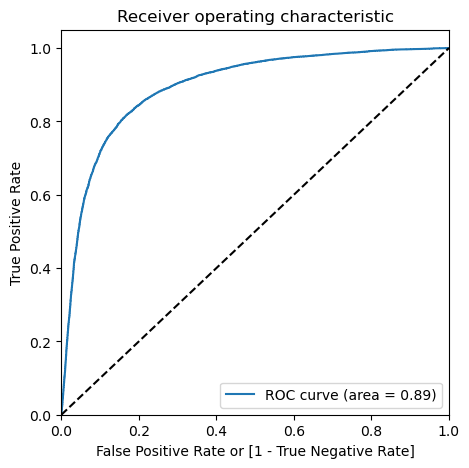

In [181]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal cutoff point

In [182]:
# creating columns with different probability cutoff

numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.087863,0,1,0,0,0,0,0,0,0,0,0
1,0,0.329312,0,1,1,1,1,0,0,0,0,0,0
2,0,0.013300,0,1,0,0,0,0,0,0,0,0,0
3,0,0.012763,0,1,0,0,0,0,0,0,0,0,0
4,0,0.877518,1,1,1,1,1,1,1,1,1,1,0


In [183]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    
    specificity=cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.501811     1.000000     0.000000
0.1   0.1  0.677907     0.976958     0.376683
0.2   0.2  0.742616     0.956750     0.526925
0.3   0.3  0.781140     0.929377     0.631826
0.4   0.4  0.806814     0.894039     0.718955
0.5   0.5  0.821865     0.853729     0.789768
0.6   0.6  0.822106     0.788720     0.855735
0.7   0.7  0.798390     0.686875     0.910716
0.8   0.8  0.733682     0.515370     0.953581
0.9   0.9  0.609658     0.239722     0.982283


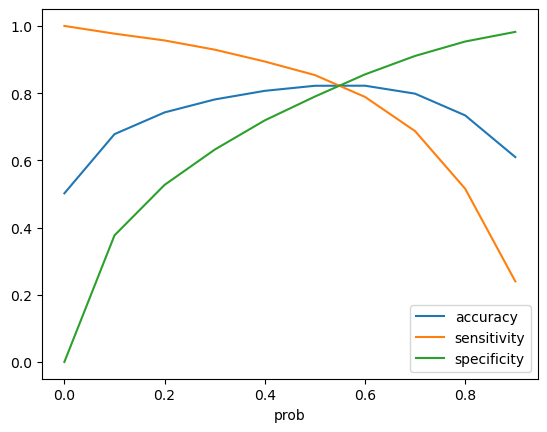

In [184]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### OBSERVATIONS
- We will take the optimal cutoff point as 0.57

### Predicting on test data

In [188]:
cols = a.columns
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)

In [189]:
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.57 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
41676,1,0.512436,0
15626,0,0.950818,1
26927,0,0.210874,0
48174,1,0.900320,1
29668,1,0.955018,1


In [190]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
print(confusion)

[[6744 1311]
 [1585 6335]]


In [191]:
# let's get the accuracy score

x = metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)
print('Accuracy of the model is ',x)

Accuracy of the model is  0.818716744913928


In [209]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [210]:
# Sensitivity

TP / float(TP+FN)

0.7998737373737373

In [211]:
# Specificity

TN / float(TN+FP)

0.837243947858473

In [212]:
# Calculating false postive rate (predicting churn when customer did not churned)

print(FP/ float(TN+FP))

0.162756052141527


### TOP PREDICTORS

In [208]:
abs(res.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8        1.811749
const               1.771235
sep_vbc_3g          1.349148
loc_og_mou_8        1.043815
monthly_2g_8        0.784659
monthly_3g_8        0.766279
std_og_mou_8        0.716800
loc_ic_mou_7        0.684937
total_rech_num_8    0.641606
sachet_2g_8         0.640525
std_og_mou_7        0.500881
dtype: float64

## INTERPRETATIONS
- Using Logistic regression we are getting ~82.2% accuracy on the train data and ~81.8% on the test data
- We also observed that the important features are mostly from the action phase